<a href="https://colab.research.google.com/github/gaurishankar9793/CNN-CAT-vs-DOG/blob/master/CNN_CAT_VS_DOGS_BEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [0]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

**LINKING GOOGLE DRIVE TO IMPORT DATA SETS**

In [9]:
path = ""

from google.colab import drive, files
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path = "/content/drive/My Drive/CNN/"
training_data_dir = path + "train/training_set"
test_data_dir = path + "test/test_set"

**HYPERPARAMETERS**

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layer reduce the spatial volume of input image after convolution.
Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer





**MODEL**

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

W0805 07:47:08.474560 140491945658240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 07:47:08.527320 140491945658240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 07:47:08.534290 140491945658240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 07:47:08.578095 140491945658240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 07:47:08.579190 1404919456

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

**CALLBACKS**

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]



**DATA  PREP**

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


In [0]:
BATCH_SIZE = 15

In [24]:
train_generator = train_datagen.flow_from_directory(training_data_dir,
	class_mode='categorical', batch_size=BATCH_SIZE,target_size= IMAGE_SIZE)

Found 1589 images belonging to 2 classes.


**FIT MODEL**
AH SHIT HERE WE GO AGAIN 

In [29]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    steps_per_epoch=1589//BATCH_SIZE,
    callbacks=callbacks
)

W0805 07:53:03.787720 140491945658240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
105/105 [==============================] - 625s 6s/step - loss: 1.3205 - acc: 0.5632
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


105/105 [==============================] - 15s 146ms/step - loss: 0.9915 - acc: 0.5865
Epoch 3/50
105/105 [==============================] - 10s 93ms/step - loss: 0.8027 - acc: 0.5897
Epoch 4/50
105/105 [==============================] - 10s 92ms/step - loss: 0.7353 - acc: 0.6072
Epoch 5/50
105/105 [==============================] - 10s 92ms/step - loss: 0.6793 - acc: 0.6512
Epoch 6/50
105/105 [==============================] - 10s 93ms/step - loss: 0.6448 - acc: 0.6721
Epoch 7/50
105/105 [==============================] - 10s 93ms/step - loss: 0.6207 - acc: 0.6817
Epoch 8/50
105/105 [==============================] - 10s 93ms/step - loss: 0.5943 - acc: 0.6894
Epoch 9/50
105/105 [==============================] - 10s 93ms/step - loss: 0.5956 - acc: 0.6981
Epoch 10/50
105/105 [==============================] - 10s 92ms/step - loss: 0.5677 - acc: 0.7159
Epoch 11/50
105/105 [==============================] - 10s 92ms/step - loss: 0.5705 - acc: 0.7128
Epoch 12/50
105/105 [=================

TIME TAKEN 1102.7465 

TRAINED ON GPU

In [0]:
model.save_weights("model.h5")

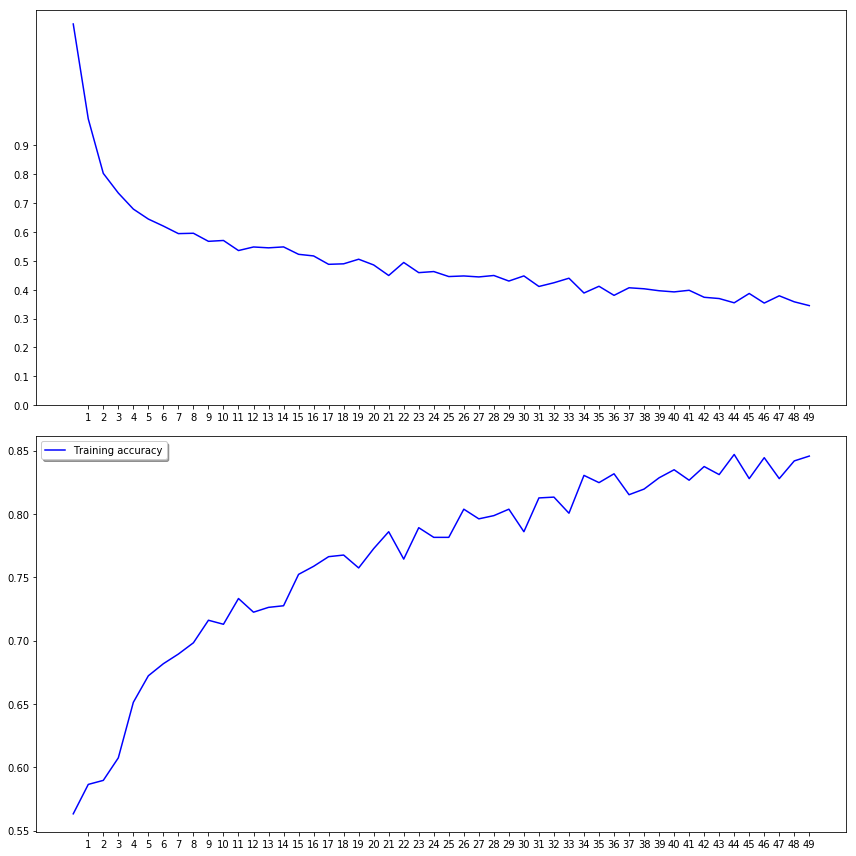

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

PREDICTION TIME

In [146]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
	class_mode=None, batch_size=1,target_size= IMAGE_SIZE,shuffle = False)

Found 378 images belonging to 2 classes.


In [0]:
test_generator.reset()
predict = model.predict_generator(test_generator,steps= 378)

CATY STORES THE PROBABILITIES

In [0]:
 caty = np.argmax(predict, axis=-1)

In [0]:
catne = 0
for f in range(188):
  if caty[f]==1:
    catne = catne +1

CATNE ARE THE NUMBER OF CATS IDENTIFIED AS DOGS

In [163]:
catne
#model can not identify 22 cats

22

DOGNE ARE THE NUMBER OF DOGS IDENTIFIED AS CAT

In [0]:
dogne = 0
for t in range(188,378):
  if caty[t] == 0:
    dogne = dogne +1

In [165]:
dogne

55

ERROR CALCULLATION

In [0]:
caterror = 100*(catne/188)
dogerror = 100*(dogne/190)

In [172]:
print('Accuracy on test set of cats %.3f' % (100 - caterror))


Accuracy on test set of cats 88.298


In [173]:
print('Accuracy on test set of dogs %.3f' % (100 - dogerror))


Accuracy on test set of dogs 71.053


CAT ACC MORE BECAUSE OF MORE AMOUNT OF DATA AVAILABLE FOR CAT

**CAT 88.298 DOG 71.053**


The Architecture and parameter used in this network are capable of producing accuracy of 84.56% on Validation Data which is pretty good. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training.